챕터 5. 지식 그래프를 활용한 그래프 RAG

- 그래프 RAG 개념과 기존 RAG 방식의 한계 이해
- 지식 그래프와 그래프 DB를 활용한 데이터 구조화 및 질의 최적화 방법
- Neo4j와 랭체인을 활용한 그래프 RAG 구현 및 응용

- 이 장에서는 그래프 RAG에 대해 다룸, 먼저 그래프 RAG의 개념과 기존 RAG와의 차이점을 살펴보고, 지식 그래프 구축 방법에 대해 알아봄, 이후 실습을 통해 그래프 RAG 시스템을 실제로 구현하는 방법 학습

1. 그래프 RAG 개요
    - 그래프 RAG는 기존 RAG 시스템의 한계를 극복하기 위해 새롭게 개발된 모델로, 지식 그래프를 활용하여 정보간의 관계를 더 깊이 이해하고 처리하는 방식, 기존 RAG가 문서를 검색하고 정보를 추출하는 데 집중했다면, 그래프 RAG는 복잡한 데이터 간의 연결성을 파악하여 다층적인 질의응답이 가능하도록 함

- 1.1 기존 RAG 방식의 한계
    - 기존의 RAG 방식에는 두 가지 주요 한계점이 있음
        1. 정보 연결의 어려움
            - 기존 RAG는 질문에 답하기 위해 개별 문서에서 정보를 검색할 수 있지만, 데이터 간의 관계를 분석하여 새로운 통찰을 제공하는 데 한계가 있음, 즉 정보 조각을 연결하여 전체적인 의미를 도출하는 능력이 부족, 예를 들어 다음과 같은 질문이 주어졌다고 가정하면
                - 질문: "이 문서의 주요 주제는 무엇인가요?"
            - 이 질문에 대해 기존 RAG 시스템에서는 나뉘어진 개별 문서에서 특정 소주제나 키워드를 검샘 가능, 기업의 사업보고서를 예로 들면, 이 질문을 기존 RAG 시스템에 입력한다면, 한 문서에서 기업의 사업 영역에 대한 내용을 찾고, 다은 문서에서 기업의 재무 상태에 대한 정보를 찾을 수 있음, 그러나 이러한 정보들은 각각 개별적으로 제공될 뿐, 데이터셋 전체에서 이러한 정보들이 어떻게 연결되고 전반적인 패턴이 무엇인지에 대해서는 알지 못함, 따라서 문서 주제와 같이 전체 내용을 아우르는 영역을 파악 하는 데는 한계가 있음
        2. 대규모 데이터 이해의 한계
            - 기존 RAG 시스템은 데이터의 규모가 클수록 개념들을 전체적으로 파악하는 데 어려움을 겪음, 아래 질문이 주어졌다고 생각하면
                - 질문: "지난 10년간의 연간 보고서를 바탕으로 회사의 지속가능성 전략 변화를 설명해 주세요."
            - 질문에 대해, 기존 RAG 시스템은 연간 보고서에서 관련 정보를 검색하여 개별 문서들을 얻을 수 있음, 하지만 이렇게 얻은 개별 문서는 각각 독립적으로 이루어져 있으며, 각 문서 안에 내용들이 다른 문서들과 어떻게 연결되는 지 알 수 없음, 따라서 10년간의 연간 보고서라는 대규모 데이터셋에서 각 정보들이 어떻게 서로 연결되고, 그 속에서 지속가능성 전략이 어떤 식으로 변화해왔는지 추적하는 데는 한계가 있음
            - 이를 해결하기 위해 그래프 RAG 가 제안됨, 그래프 RAG는 전체 텍스트 코퍼스에 대한 질문에 답하기 위해 지식 그래프와 검색 증강 생성을 결합한 접근 방식, 그래프 RAG는 지식 그래프를 활용해 개별 정보 조각들 간의 관계를 모델링함으로써, 데이터셋 전체에서 연결성솨 패턴을 파악 가능, 또한 대규모 데이터셋의 구조적 관계를 분석함으로써, 시간 경과에 따른 변화나 전체적인 개념을 더 효과적으로 이해할 수 있음

- 1.2 지식 그래프란?
    - 그래프는 "네트워크 구조를 수학적으로 표현한 모델"로 상호 연결된 요소들 간의 관계를 나타내는 구조, 여기서 네트워크란 우리 주변에서 흔히 볼 수 있는 "상호 연결된 시스템"을 말함, 네트워크는 우리 일상 곳곳에 존재, 예를 들어 우리가 매일 사용하는 소셜 미디어 플랫폼은 거대한 소셜 네트워크, 페이스북이나 인스타그램에서 사용자들은 서로 "친구"를 맺거나 "팔로우"를 하며 관계를 맺음, 이러한 관계들이 모야 하나의 큰 네트워크를 이룸
    - 또 다른 예로 교통 시스템을 들 수 있음, 도시들은 도로, 철도, 항공로 등으로 서로 연결되어 있음, 이 연결망은 사람과 물자가 이동할 수 있는 교통 네트워크를 형성, 인터넷 연시 대표적인 네트워크의 예, 전 세계 컴퓨터와 서버들이 서로 연결되어 정보를 주고받는 거대한 시스템을 형성
    - 이러한 네트워크들의 공통점은 모두 "개체"와 그들 사이의 "관계"로 구성되어 있다는 점, 소셜 네트워크에서는 사람들이 개체이고, 그들 사이의 친구 관계나 팔로우가 연결 요소, 교통 네트워크에서는 도시가 개체이고, 도로나 철도가 그 사이의 연결 역할을 함, 인터넷에서는 컴퓨터나 서버가 개체이고, 데이터 전송 경로가 연결 요소로 작용
    - 이러한 현실 세계의 네트워크 구조를 수학적으로 표현하고 분석하기 위해 그래프라는 모델을 사용, 그래프에서는 맥락에 따라 용어가 다양하게 사용, 수학적 맥락에서는 주로 노드(정점)와 에지(간선)라는 용어를 사용하고, 응용 분야에서는 개체와 관계로 표현하는 경향이 있음
    - 특히 그래프는 단순한 연결 구조뿐만 아니라, 방향성과 가중치도 표현 가능, 예를 들어 SNS의 팔로우 관계처럼 한쪽에서 다른 쪽으로 향하는 단방향 연결을 나타낼 수 있으며, 교통 네트워크에서 도시 간 거리처럼 연결 강도나 관계의 중요도를 반영하는 가중치를 추가할 수도 있음
    - 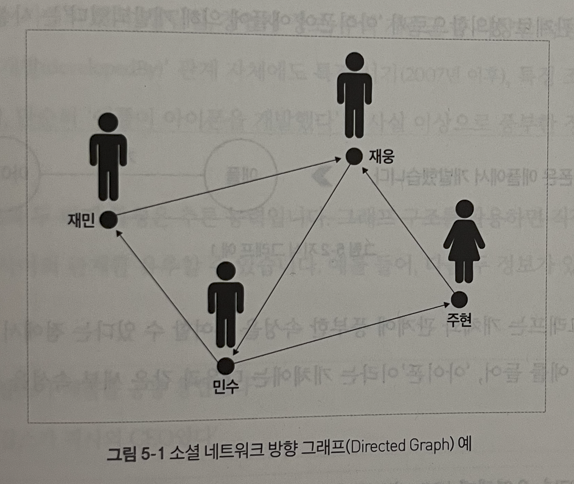

    - 결론적으로, 그래프는 네트워크를 수학적으로 표현하는 모델이며, 이를 통해 복잡한 시스템의 구조를 명확하게 모델링하고 다양한 수학적 기법을 적용하여 네트워크의 특성을 분석할 수 있음
    - 이러한 기본적인 그래프 개념을 바탕으로 지식 그래프는 정보와 지식을 보다 구조화하여 표현하는 특별한 형태의 그래프로 확장, 일반적인 그래프는 노드와 에지로 구성되며, 개체나 그들 간의 연결 구조를 나타내는 데 초점을 둠, 하지만 개체와 관계의 구체적인 의미나 속성에 중점을 두지 않고, 단순히 "연결되어 있다" 는 사실만을 표현하는 경우가 많음
    - 반면, 지식 그래프는 개체와 관계에 의미론적 정보를 부여하여 각 요소가 무엇을 의미하는 지 명확하게 정의, 즉 지식 그래프는 일반 그래프의 기본 구조 위에 의미를 추가하여 정보를 보다 구체적으로 구조화하여 표현, 예를 들어 "아이폰"과 "애플"이라는 두 개체를 생각해 보면, 일반 그래프에서는 이 둘이 단순히 연결선으로 이어져 있을 뿐이지만, 지식 그래프에서는 이 연결을 "개발"이라는 명확한 관계로 정의함으로써 "아이폰이 애플에 의해 개발되었다"는 사실을 구체적으로 나타냄
    - 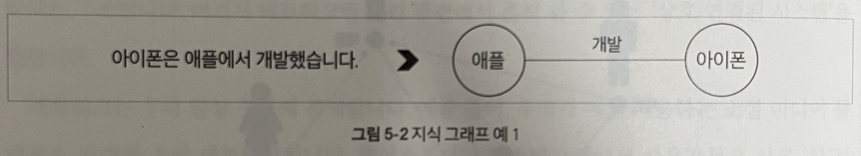

    - 또한 지식 그래프는 개체와 관계에 풍부한 속성을 부여할 수 있다는 점에서 일반 그래프와 차별화됨, 예를 들어, "아이폰"이라는 개체에는 다음롸 같은 세부 속성을 추가 가능
        - 출시일: 2007년, 운영체제: iOS, 디스플레이: 3.5인치
    - 마찬가지로, "개발"이라는 관계 자체에도 다음과 같은 속성을 추가할 수 있음
        - 개발 시기: 2007년 이후, 개발 조건: iOS 기반
    - 이러한 구조 덕분에 지식 그래프는 일반 그래프와 다른 여러 특징을 지니고 있음
    - 첫 번째 특징은 단순한 관계 연결을 넘어 복잡한 정보 구조를 표현할 수 있다는 점, 일반 그래프에서는 "아이폰"과 "애플"이라는 구 개체가 단순히 연결되어 있음, 이때 연결선은 그저 "이 둘이 어떤 관계를 맺고 있다"는 사실만을 나타냄, 반면 지식 그래프에서는 이 연결선을 "개발"이라는 명확한 의미를 지닌 관계로 정의, "아이폰"이라는 제품이 "애플"이라는 기업에 의해 개발되었다는 사실을 기계가 해석하고 활용할 수 있게 함
    - 더 나아가, 지식 그래프는 이러한 관계를 더욱 풍부하게 표현할 수 있음, 예를 들어 "아이폰" 개체에는 출시일, 운영체제, 디스플레이 크기 등 세부 속성을 명확하게 정의할 수 있고, "애플"개체에는 기업의 위치, 설립일, 창업자 정보, 주력 제품군 등 다양한 속성을 추가할 수 있음, 또한 "개발" 관계 자체에도 특정 시기(2007년 이후), 특정 조건(iOS 운영체제)등을  기술하여, 단순히 "애플이 아이폰을 개발했다"는 사실 이상으로 풍부한 정보를 담아낼 수 있음
    - 지식 그래프의 두 번째 특징은 추론 능력, 그래프 구조를 활용하면 직접적으로 연결되지 않은 정보 사이의 관계를 유추할 수 있음, 예를 들어, 다음 두 정보가 있다고 가정하면
        1) "스티브 잡스가 애플을 공동 창업했다"
        2) "스티브 잡스가 픽사의 CEO였다"
    - 이 정보들을 개별적인 문장으로만 볼 때는 애플과 픽사 사이의 연관성을 바로 파악하기 어려움, 하지만 이를 다음과 같은 지식 그래프로 표현하면 "스티브 잡스"라는 노드를 중심으로 애플과 픽사가 연결되어 있음을 한눈에 확인 가능
    - 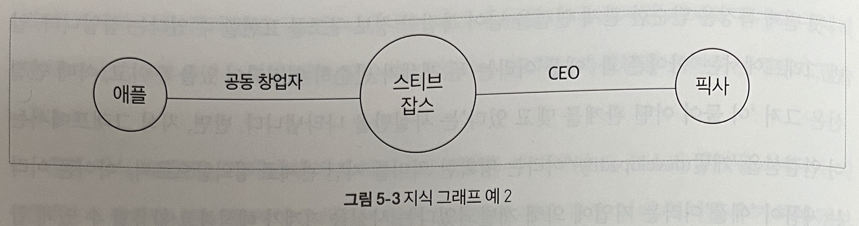

    - 이를 통해 애플과 픽사 사이의 간접적인 연관성을 쉽게 추론할 수 있으며, 두 회사의 혁신적인 기업 문화나 창의적인 제품 개발 철학과 같은 공통점을 예측해볼 수도 있음, 이렇듯 그래프 구조는 개별적인 정보 조각들을 연결하여 보다 심층적인 관계를 도출하는 데 유용
    - 세 번째 특징은 효율적인 정보 검색, 지식 그래프를 활용하면 노드와 에지의 연결을 따라 관련 정보를 빠르게 탐색하고 검색할 수 있음, 예를 들어, "애플"노드에서 시작하여 이웃 노드인 "맥북", "스티브 잡스", "팀 쿡" 등의 정보를 쉽게 검색할 수 있음
    - 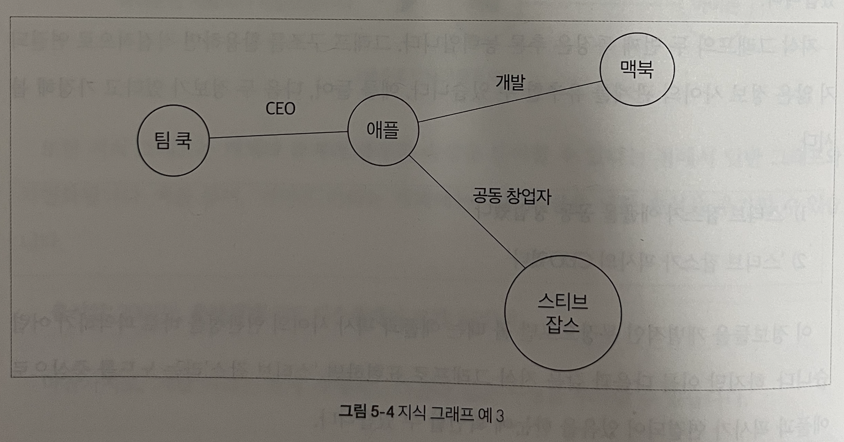

    - 이러한 특성 덕분에 지식 그래프는 검색 엔진이나 추천 시스템, 질의응답 시스템 등 다영한 분야에서 활용되고 있음, 그래프 RAG는 이러한 지식 그래프의 장점을 적극적으로 활용하여, 단순한 키워드 매칭을 넘어 정보 간의 복잡한 관계를 고려한 고급 추론과 답변 생성을 수행

- 1.3 그래프 RAG의 동작 과정
    - 이제 그래프 RAGㅁ의 구체적인 동작 과정을 알아보면, 그래프 RAG 시스템은 먼저 그래프 DB를 구축 한 후, 사용자 질의에 따라 적절한 검색 방식을 적용하여 답변을 생성하는 방식으로 작동, 그래프 DB 구축 단계에서는 문서 내용을 분석하여 지식 그래프를 생성하는 방식으로 작동, 그래프 DB 구축 단계에서는 문서 내용을 분석하여 지식 그래프를 생성, 이 과정에서 문서에서 추출한 주요 개념(개체)과 그들 사이의 관계를 구조화하여 그래프 형태로 저장, 이후 구축된 그래프 내에서 서로 밀접하게 연관된 개체들의 그룹(커뮤니티)을 찾아내고, 각 커뮤니티의 핵심 내용을 요략하여 정보 검색을 보다 효율적으로 수행할 수 있도록 함, 사용자가 질문을 하면, 그래프 RAG 시스템은 질문의 성격에 따라 두 가지 검색 방식을 사용
        - 로컬 검색: 질문과 직접적으로 관련된 개체들을 식별하고, 이들과 연관된 정보를 수집하여 상세한 답변 제공, 이는 특정 주제나 세부 정보를 묻는 질문에 효과적
        - 글로벌 검색: 문서 전체를 아우르는 포괄적인 질문에 대해, 여러 커뮤니티 요약을 활용하여 종합적인 답변을 제공
    - 이러한 과정을 통해 그래프 RAG는 방대한 문서 컬렉션에서도 관련성 높은 정보를 빠르게 찾아내고, 이를 바탕으로 포괄적이로 정확한 답변을 생성할 수 있음

2. 그래프 DB 구축

- 2.1 그래프 DB 구축 과정
    - 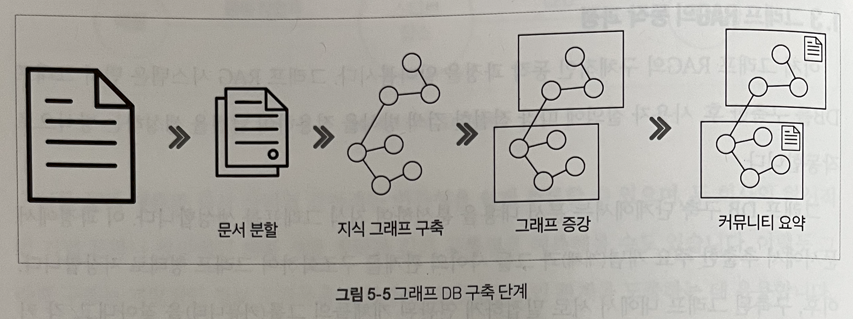

    - 그래프 DB 구축 과정은 4개의 주요 단계로 이루어져 있음
    - 첫 번째 단계는 "문서 분할", 이 과정에서는 대용량 문서를 효율적으로 처리하기 위해 문서를 적절한 크기로 나눔
    - 두 번째 단계는 "지식 그래프 구축", 이 과정에서는 앞서 분할한 문서에서 핵심 개채와 그들 간의 관계를 추출하여 기본적인 그래프 구조를 만듬
    - 세 번째 단계는 "그래프 증강", 이 과정에서는 그래프 임베딜을 생성하여 기존에 생성된 그래프를 더욱 풍부하게 만들며, 지식 그래프 내에서 서로 밀접하게 연관된 엔티티들을 그룹화한 "커뮤니티"를 구축하여 실제 활용이 가능한 수준으로 발전 시킴
    - 마지막 단계는 "커뮤니티 요약", 이 과정에서는 구축된 커뮤니티으 핵심 정보를 요약, 이를 통해 최종적으로 검색과 활용이 용이한 형태의 지식 네트워크를 완성, 이러한 단계적 접근을 통해 단순한 텍스트 문서들이 구조화되고 의미적으로 연결된 지식 네트워크로 변환

    1. 문서 분할
        - 가장 먼저, 사용할 문서를 적절한 크기로 분한, 이때 분할할 문서의 길이 설정이 중요, 문서의 길이가 길수록 LLM을 호출하는 횟수가 적어지므로 지식 그래프 구축에 드는 비용이 줄어든다는 장점이 있지만, 지식 그래프 품질이 낮아질수 있다는 단점이 있음, 반대로, 문서의 길이가 짧아질수록 지식 그래프 구축에 드는 비용은 늘어나지만, 지식 그래프 품질은 높아질 수 있음
        - 연구에 따르면 문서를 600토큰 수준으로 분할했을 때, 2400토큰 수준으로 분할한 경우보다 감지되는 엔티티(개체)의 수가 거의 두 배 가까이 증가한 것으로 나타남, 따라서 문서 분할의 경우, 가용 가능한 자원과 원하는 수준의 품질을 고려하여 적절히 선택하는 것이 중요
    
    2. 지식 그래프 구축
        - 다음으로, 지식 그래프를 생성하고 DB를 구축, 지식 그래프는 소수 문서에서 엔티티(개체)와 그들 사이의 관계를 추출하여 만들수 있음, 이 단계에서 만든 지식 그래프는 이후 사용할 모든 정보의 기반이 됨, 즉 지식 그래프를 구축함으로써 단순한 텍스트 집합을 구조화된 데이터로 변환하여, 이후 단계에서 효과적으로 활용할 수 있게 됨
        - 먼저, 이러한 지식 그래프 구축에 어떤 기술이 활용되는 지 알아봄, 최근에는 대규모 언어 모델(LLM)을 활용하여 그래프를 구축하는 방법을 많이 사용, 이전에는 다른 방법을 사용, LLM 이전에 사용된 기술들에는 규칙 기반 접근법과 기계학습 모델 등이 있음
            - 규칙 기반 접근법
                - 규칙 기반 접근법은 미리 정의된 언어 규칙이나 패턴을 사용하여 엔티티와 관계를 기계적으로 추출하는 방식, 예를 들어 아래 패턴을 사용한다고 가정하면
                    - 패턴: "회사명 + '은/는' + 제품명 + '을 출시 했다'"
                - 만약 문서 내에 "삼성전자는 갤럭시 S23을 출시했다"라는 문장이 있다면 이 패턴이 동작하여, "삼성전자"와 "갤럭시 S23"이 엔티티로 추출되며, "출시"가 이들을 잇는 관계로 추출될 것, 규칙 기반 접근법은 구현이 간단하고 명확하지만, 패턴에 정확히 일치하는 경우에만 작동하기 때문에 확장성과 유연성이 부족하며, 다양한 표현과 복잡한 문장을 처리하는 데는 한계가 있음
            
            - 기계학습 모델
                - 기계학습 기반 모델은 머신러닝 알고리즘을 활용하여 엔티티 및 관계 추출 모델을 만듬, 사용되는 알고리즘에는 대표족으로 SVM(서포트 벡터 머신), CRF(조건부 랜덤 필요)가 있음